In [1]:
from autorank import autorank, create_report,plot_stats,latex_table

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rcParams

In [4]:
# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

In [5]:
rcParams['font.weight'] = 'bold'
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

In [6]:
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12

In [7]:
df_raw = pd.read_csv("CSV_RESULTS/init_multi_run.csv")

In [8]:
df_raw

,run,model,dataset,r2_score,rmse,time,memory
0,1,ARFR,FriedmanGra,0.761625,2.432060,1550.531878,671.937500
1,10,ARFR,FriedmanGra,0.758638,2.447255,1176.423257,684.464844
2,2,ARFR,FriedmanGra,0.746769,2.506704,1536.074594,683.554688
3,3,ARFR,FriedmanGra,0.755229,2.464473,1486.443159,650.324219
4,4,ARFR,FriedmanGra,0.749833,2.491491,1138.321447,670.890625
...,...,...,...,...,...,...,...
1115,5,SOKNL,white_wine,0.277089,0.756958,9.878631,996.687500
1116,6,SOKNL,white_wine,0.284095,0.753282,10.012788,785.394531
1117,7,SOKNL,white_wine,0.289639,0.750359,10.655154,788.617188
1118,8,SOKNL,white_wine,0.289318,0.750529,9.594957,1078.011719


In [9]:
# only for normal result with single-run
#df = df_raw.pivot(index='dataset',columns='model',values='memory')

In [9]:
# only for normal result with multi-run
df = df_raw.pivot_table(index='dataset',columns='model',values='rmse',aggfunc='mean')

In [10]:
df

model,ARFR,ASML-REG,ASML-REG-best,ASML-REG-med,CHACHA,EAML-REG,HATR,SOKNL
dataset,,,,,,,,
FriedmanGra,2.463916,1.983748,2.373091,1.999139,2.888754,2.998178,2.548985,2.133261
FriedmanGsg,2.495528,1.988681,2.407488,2.002836,3.025300,2.894878,2.343849,2.166409
FriedmanLea,2.482506,2.158407,2.719614,2.131145,3.176917,3.408804,2.474522,2.213563
House8L,37471.598600,36087.659844,40052.421260,37316.931583,72706.286822,38800.656298,40714.638391,36251.951526
MetroTraffic,1761.532281,1474.424674,1436.678472,1471.926148,3656.152793,1872.968812,1856.381382,1692.520266
abalone,2.122323,2.066262,2.229254,2.080217,2.458612,2.089689,2.207156,2.703519
ailerons,0.069865,0.051642,0.055120,0.050060,0.051430,0.049136,0.054718,0.067088
bike,89.202403,72.943064,90.852266,77.361449,179.865864,74.927188,91.609550,96.851639
cpu_activity,8.235510,5.826405,5.927341,6.748176,26.137790,6.246245,9.759346,5.472728


In [11]:
df.index.name = None
df.columns.name=None

In [12]:
df

,ARFR,ASML-REG,ASML-REG-best,ASML-REG-med,CHACHA,EAML-REG,HATR,SOKNL
FriedmanGra,2.463916,1.983748,2.373091,1.999139,2.888754,2.998178,2.548985,2.133261
FriedmanGsg,2.495528,1.988681,2.407488,2.002836,3.025300,2.894878,2.343849,2.166409
FriedmanLea,2.482506,2.158407,2.719614,2.131145,3.176917,3.408804,2.474522,2.213563
House8L,37471.598600,36087.659844,40052.421260,37316.931583,72706.286822,38800.656298,40714.638391,36251.951526
MetroTraffic,1761.532281,1474.424674,1436.678472,1471.926148,3656.152793,1872.968812,1856.381382,1692.520266
abalone,2.122323,2.066262,2.229254,2.080217,2.458612,2.089689,2.207156,2.703519
ailerons,0.069865,0.051642,0.055120,0.050060,0.051430,0.049136,0.054718,0.067088
bike,89.202403,72.943064,90.852266,77.361449,179.865864,74.927188,91.609550,96.851639
cpu_activity,8.235510,5.826405,5.927341,6.748176,26.137790,6.246245,9.759346,5.472728
elevators,0.003955,0.003069,0.003076,0.002926,0.002513,0.003511,0.003886,0.004099


In [14]:
df = df[[
    'ASML-REG',
 'ASML-REG-best',
 'ASML-REG-med',
 'EAML-REG',
 'CHACHA',
 'SOKNL',
 'ARFR',
 'HATR'
]]

In [15]:
df

,ASML-REG,ASML-REG-best,ASML-REG-med,EAML-REG,CHACHA,SOKNL,ARFR,HATR
FriedmanGra,1.983748,2.373091,1.999139,2.998178,2.888754,2.133261,2.463916,2.548985
FriedmanGsg,1.988681,2.407488,2.002836,2.894878,3.025300,2.166409,2.495528,2.343849
FriedmanLea,2.158407,2.719614,2.131145,3.408804,3.176917,2.213563,2.482506,2.474522
House8L,36087.659844,40052.421260,37316.931583,38800.656298,72706.286822,36251.951526,37471.598600,40714.638391
MetroTraffic,1474.424674,1436.678472,1471.926148,1872.968812,3656.152793,1692.520266,1761.532281,1856.381382
abalone,2.066262,2.229254,2.080217,2.089689,2.458612,2.703519,2.122323,2.207156
ailerons,0.051642,0.055120,0.050060,0.049136,0.051430,0.067088,0.069865,0.054718
bike,72.943064,90.852266,77.361449,74.927188,179.865864,96.851639,89.202403,91.609550
cpu_activity,5.826405,5.927341,6.748176,6.246245,26.137790,5.472728,8.235510,9.759346
elevators,0.003069,0.003076,0.002926,0.003511,0.002513,0.004099,0.003955,0.003886


In [17]:
res = autorank(df,alpha=0.05,order='ascending',verbose=True,effect_size="cohen_d",force_mode='nonparametric')
#res = autorank(df,alpha=0.06,order='descending',verbose=True,effect_size="cohen_d",force_mode='nonparametric')

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Rejecting null hypothesis that data is normal for column ASML-REG (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column ASML-REG-best (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column ASML-REG-med (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column EAML-REG (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column CHACHA (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column SOKNL (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column ARFR (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column HATR (p=0.000000<0.006250)
Using Levene's test for homoscedacity of non-normal data.
Fail to reject null hypothesis that all variances are equal (p=0.998770>=0.050000)
Using Friedman test as omnibus test
Rejecting null hypothesis

In [18]:
res.rankdf

,meanrank,median,mad,ci_lower,ci_upper,effect_size,magnitude
ASML-REG,1.642857,1.986214,1.544773,0.003069,36087.659844,0.0,negligible
ASML-REG-med,2.285714,2.000987,1.553018,0.002926,37316.931583,-0.008993,negligible
ASML-REG-best,4.500000,2.376659,1.901042,0.003076,40052.42126,-0.027739,negligible
SOKNL,4.714286,2.189986,1.713043,0.004099,36251.951526,-0.003026,negligible
ARFR,5.000000,2.293120,1.825564,0.003955,37471.5986,-0.012321,negligible
EAML-REG,5.500000,2.946528,2.340119,0.003511,38800.656298,-0.022327,negligible
HATR,5.785714,2.275502,1.747147,0.003886,40714.638391,-0.03506,negligible
CHACHA,6.571429,2.858117,2.341039,0.002513,72706.286822,-0.181794,negligible


In [19]:
round(res.cd,3)

2.806

In [20]:
create_report(res)

The statistical analysis was conducted for 8 populations with 14 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations ASML-REG (p=0.000), ASML-REG-med (p=0.000), ASML-REG-best (p=0.000), SOKNL (p=0.000), ARFR (p=0.000), EAML-REG (p=0.000), HATR (p=0.000), and CHACHA (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than t

C:\Users\NILESH-VERMA\miniconda3\lib\site-packages\autorank\_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


In [21]:
file_name = 'asml_reg_cd_rmse_score'
#file_name = 'asml_reg_cd_time'
#file_name = 'asml_reg_cd_memory'

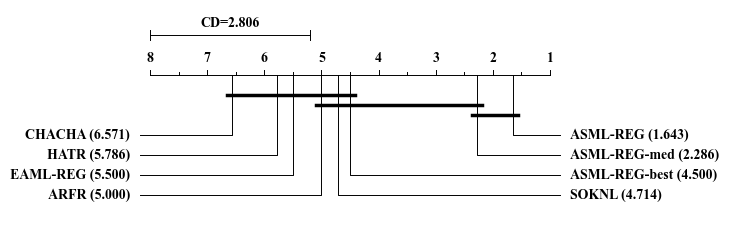

In [23]:
plot_stats(res,allow_insignificant=True)
plt.savefig(f'CHARTS/{file_name}.png',dpi=300,bbox_inches='tight')
plt.show()